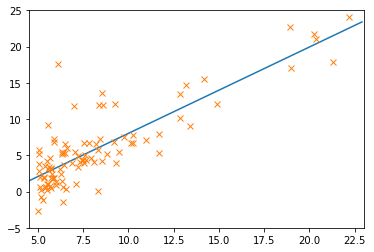

In [7]:
from pandas.io.parsers import read_csv 
import matplotlib.pyplot as plt #importar biblioteca y renombrarla a plt
import numpy as np

def readCsv(nombre):
    valores = read_csv(nombre, header = None).values
    return valores.astype(float)

def regresionLinear(X, y, m=0, b=0, vueltas=1500, ratio=0.01):
    # b es el termino idependiente
    # m es la teta que acompaña a X en la ecuacion recta
    N = float(len(y))
    for i in range(vueltas):#hacemos las vueltas totales
        yac = (m * X) + b
        cost = sum([data**2 for data in (y-yac)]) / N #sacamos el coste de la fucion actual mediante el sumatorio
        m_gradiente = -(2/N) * sum(X * (y - yac))
        b_gradiente = -(2/N) * sum(y - yac)
        m = m - (ratio * m_gradiente)
        b = b - (ratio * b_gradiente)
    return m, b, cost
    
    
def regLineal1Variable():
    fig = plt.figure()
    plt.xlim(4.5,23)
    plt.ylim(-5,25)
    valores = readCsv("ex1data1.csv") #Doble array valores[x][y]
    datos = regresionLinear(valores[0:,0],valores[0:,1])#[0] es m ,[1] es b ,[2] es el coste
    
    x = np.arange(4.5,23,0.1)
    y = x * datos[0] + datos[1]
    plt.plot(x,y)
    
    plt.plot(valores[0:,0],valores[0:,1],'x')

regLineal1Variable()

In [43]:
def normaliza(valores):
    mediax = np.mean(valores[0:,0])
    mediay = np.mean(valores[0:,1])
    mediaz = np.mean(valores[0:,2])
    desTx = np.std(valores[0:,0])
    desTy = np.std(valores[0:,1])
    desTz = np.std(valores[0:,2])
    #normalizamos los valores
    valores[0:,0] = (valores[0:,0]-mediax)/desTx
    valores[0:,1] = (valores[0:,1]-mediay)/desTy
    valores[0:,2] = (valores[0:,2]-mediaz)/desTz
    mu = [mediax,mediay,mediaz]
    sigma = [desTx,desTy,desTz]
    return valores, mu, sigma
def compute_cost(features,values,theta):
    
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features,theta)-values).sum()
    cost = sum_of_square_errors/ (2*m)
    return cost

def descensoGradiente(features, values, theta, alpha, num_iterations):
    m = len(values)
    cost_history = []
    
    for i in range(num_iterations):
        predicted_values = np.dot(features,theta)
        theta = theta - alpha / m * np.dot((predicted_values - values),features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

def regLinealMultiplesVariables():
    fig = plt.figure()
    x = readCsv("ex1data2.csv") #Triple array valores[x][y][z]
    #precio = m * pies^2 + m1 * numHabitaciones
    datos = normaliza(x)
    normalizado = datos[0]
    medias = datos[1]
    desviaEs = datos[2]
    features = [normalizado[0:,0],normalizado[0:,1]]
    theta = np.ones()
    descensoGradiente(features,normalizado[0:,2],theta,0.1,1600)
    
regLinealMultiplesVariables()

ValueError: shapes (2,47) and (2,47) not aligned: 47 (dim 1) != 2 (dim 0)

<Figure size 432x288 with 0 Axes>